## [时频谱](https://zh.wikipedia.org/zh-cn/%E6%97%B6%E9%A2%91%E8%B0%B1)

时频谱（英语：Spectrogram）又称声谱图（voicegram），是一种描述波动的各频率成分如何随时间变化的热图。利用傅里叶变换得到的传统的2维频谱可展示复杂的波动是如何按比例分解为简单波的叠加（分解为频谱），但是无法同时体现它们随时间的变化。能对波动的时间变量与频率分布同时进行分析的常用数学方法是短时距傅里叶变换，但是直接绘成3维图像的话又不便于在纸面上观察和分析。时频谱在借助时频分析方法的基础上，以热图的形式将第3维的数值用颜色的深浅加以呈现。

它的横轴表示时间，纵轴表示频率。

时频图中的颜色表示振幅的大小。颜色越深，振幅越大；颜色越浅，振幅越小。这样，您可以通过观察时频图中的颜色来了解声音信号中不同频率成分的强度。
况进行调整。


In [19]:
import torch
import torchaudio
import matplotlib.pyplot as plt

from dataset.noise import NoiseDataset


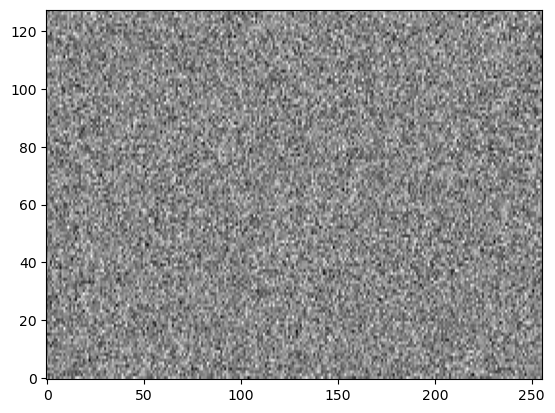

In [13]:

nd = NoiseDataset(shape=(128, 256), num_samples=1, noise_std=0.01)

# plt.imshow(nd[0], cmap='gray', aspect='auto', origin='lower')
plt.pcolormesh(nd)
plt.show()

shape before trim: (110272,)
shape after trim: (95744,)


d:\condaenv\pytorch\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  warnings.warn(


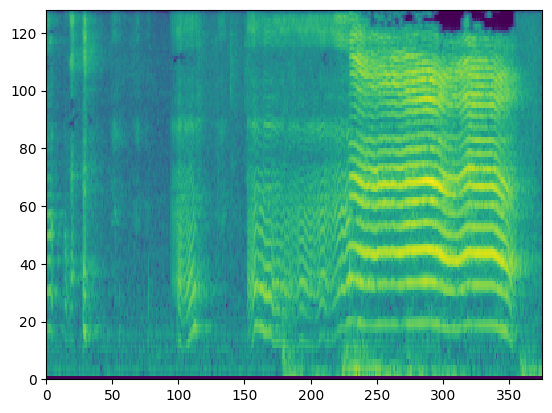

In [20]:
import librosa
from IPython.display import Audio
from utils.audio import *

wav, sr = librosa.load('E:/dataset/donate-a-cry-corpus/baby-cry-detection-ogg/1-22694-A.ogg')

print(f'shape before trim: {wav.shape}')
wav, _ = wav_trim(wav)
print(f'shape after trim: {wav.shape}')
# Audio(wav, rate=sr)
spec = wav_to_spectrogram(torch.Tensor(wav), 512, 512, 256, 128)

# plt.imshow(nd[0], cmap='gray', aspect='auto', origin='lower')
plt.pcolormesh(spec)
plt.show()

In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

from torch import nn

new_freq = 24000
n_fft = 512
hop_length = 240
win_length = 480
n_mels = 128

# audio = torch.rand(num_samples)
# audio = torch.randn(num_samples)
# audio = torch.normal(123, 100000, size=(num_samples,))
audio, sr = torchaudio.load('E:/dataset/bilibili/esc50cry1.wav')
# audio, sr = torchaudio.load('../data/ESC-50-master/audio/5-253094-A-49.wav')

preprocess = torch.nn.Sequential(
    torchaudio.transforms.Resample(orig_freq=sr, new_freq=new_freq), 
    # NoiseTransform(), 
    mel_spectrogram,
    Log2Transform(), 
)

audio = preprocess(audio)
print(spec.size())

plt.figure()
# plt.pcolormesh(spec[0].log2(), cmap='gray')
plt.imshow(spec[0].log2(), cmap='gray', aspect='auto', origin='lower')
plt.show()

plt.imshow(spec[0,:,:250].log2(), cmap='gray', aspect='auto', origin='lower')
plt.show()

NameError: name 'torchaudio' is not defined

要通过音频样本点数据画出时频图，需要经过以下步骤：
 
将音频信号分段：将整个音频信号分成若干个重叠或不重叠的段，每段包含一定数量的样。点- 。
对每一段进行窗函数处理：为了减少频谱泄漏，可以对每一段信号进行窗函数处- 理。
对每一段进行傅里叶变换：对每一段经过窗函数处理后的信号进行傅里叶变换，得到每一段的- 频谱。
计算每一段的幅度谱：对每一段的频谱取模，得到每一段的- 幅度谱。
绘制时频图：将每一段的幅度谱按时间顺序排列，绘
制成时频图。
这样，您就可以通过音频样本点数据画出时频图了。不同的软件和工具可能会有不同的细节和参数设置，您可以根据具体情况进行调整。


In [ ]:
import numpy as np
from scipy import signal

def segment_signal(signal, frame_size, overlap):
    """
    将音频信号分段
    :param signal: 音频信号
    :param frame_size: 每一帧的大小
    :param overlap: 帧与帧之间的重叠大小
    :return: 分段后的音频信号
    """
    step = frame_size - overlap
    shape = (signal.shape[-1] - overlap) // step, frame_size
    strides = signal.strides[:-1] + (step * signal.strides[-1], signal.strides[-1])
    return np.lib.stride_tricks.as_strided(signal, shape=shape, strides=strides)

def apply_window(frames, window):
    """
    对每一帧进行窗函数处理
    :param frames: 音频帧
    :param window: 窗函数
    :return: 窗函数处理后的音频帧
    """
    return frames * window

def compute_fft(frames, nfft):
    """
    对每一帧进行傅里叶变换
    :param frames: 音频帧
    :param nfft: 傅里叶变换点数
    :return: 每一帧的频谱
    """
    return np.fft.rfft(frames, n=nfft)

def compute_magnitude(spectrum):
    """
    计算每一帧的幅度谱
    :param spectrum: 频谱
    :return: 幅度谱
    """
    return np.abs(spectrum)

def plot_spectrogram(magnitude, sample_rate, frame_size, overlap):
    """
    绘制时频图
    :param magnitude: 幅度谱
    :param sample_rate: 采样率
    :param frame_size: 每一帧的大小
    :param overlap: 帧与帧之间的重叠大小
    """
    step = frame_size - overlap
    time = np.arange(magnitude.shape[0]) * step / sample_rate
    freq = np.fft.rfftfreq(frame_size) * sample_rate
    print(f'step:{step}')
    print(f'time shape:{time.shape} data:{time}')
    print(f'freq shape:{freq.shape} data:{freq}')

    print(f'magnitude.shape before log10: {magnitude.shape}')
    magnitude = 20 * np.log10(magnitude)
    print(f'magnitude.shape after log10: {magnitude.shape}')
    print(f'magnitude.T.shape: {magnitude.T.shape}')
    
    plt.pcolormesh(time, freq, magnitude.T)

frames shape: (1101, 400)
window shape: (400,)
frames shape: (1101, 400)
spectrum shape: (1101, 201)
magnitude shape: (1101, 201)
step:200
time shape:(1101,) data:[0.00000000e+00 4.53514739e-03 9.07029478e-03 ... 4.97959184e+00
 4.98412698e+00 4.98866213e+00]
freq shape:(201,) data:[    0.     110.25   220.5    330.75   441.     551.25   661.5    771.75
   882.     992.25  1102.5   1212.75  1323.    1433.25  1543.5   1653.75
  1764.    1874.25  1984.5   2094.75  2205.    2315.25  2425.5   2535.75
  2646.    2756.25  2866.5   2976.75  3087.    3197.25  3307.5   3417.75
  3528.    3638.25  3748.5   3858.75  3969.    4079.25  4189.5   4299.75
  4410.    4520.25  4630.5   4740.75  4851.    4961.25  5071.5   5181.75
  5292.    5402.25  5512.5   5622.75  5733.    5843.25  5953.5   6063.75
  6174.    6284.25  6394.5   6504.75  6615.    6725.25  6835.5   6945.75
  7056.    7166.25  7276.5   7386.75  7497.    7607.25  7717.5   7827.75
  7938.    8048.25  8158.5   8268.75  8379.    8489.25  8599

/tmp/ipykernel_1846/2478737392.py:59: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(magnitude)


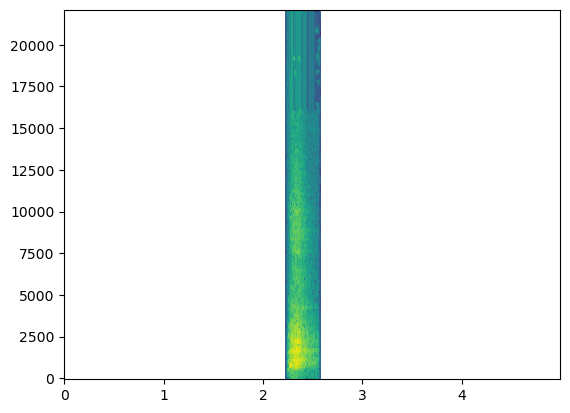

In [ ]:
frame_size = 400 # 每一帧的大小，以样本点为单位
overlap = 200 # 帧与帧之间的重叠大小，以样本点为单位

# 加载音频文件并获取音频信号和采样率（这里假设您已经加载了音频文件并获取了音频信号和采样率）
# audio_signal, sample_rate = wav
audio_signal = waveform[0,:].numpy()

# 将音频信号分段
frames = segment_signal(audio_signal, frame_size=frame_size, overlap=overlap)
print(f'frames shape: {frames.shape}')

# 对每一帧进行窗函数处理（这里使用汉明窗）
window = signal.windows.hamming(frame_size)
frames = apply_window(frames, window)
print(f'window shape: {window.shape}')
print(f'frames shape: {frames.shape}')

# 对每一帧进行傅里叶变换（这里假设傅里叶变换点数等于每一帧的大小）
spectrum = compute_fft(frames, nfft=frame_size)
print(f'spectrum shape: {spectrum.shape}')

# 计算每一帧的幅度谱
magnitude = compute_magnitude(spectrum)
print(f'magnitude shape: {magnitude.shape}')

# 绘制时频图（这里假设您已经导入了 matplotlib 库并定义了 plt）
plot_spectrogram(magnitude, sample_rate=sample_rate, frame_size=frame_size, overlap=overlap)


In [ ]:
file = '/home/jovyan/data/ESC-50-master/audio/1-100032-A-0.wav'

In [ ]:
import torchaudio
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
waveform, sample_rate = torchaudio.load(file, normalize=True)
print(f'audio channels:{waveform.shape[0]} samples:{waveform.shape[1]} sample_rate:{sample_rate} length:{waveform.shape[1] / sample_rate} sec')
display.Audio(waveform.numpy(), rate=sample)

audio channels:1 samples:220500 sample_rate:44100 length:5.0 sec


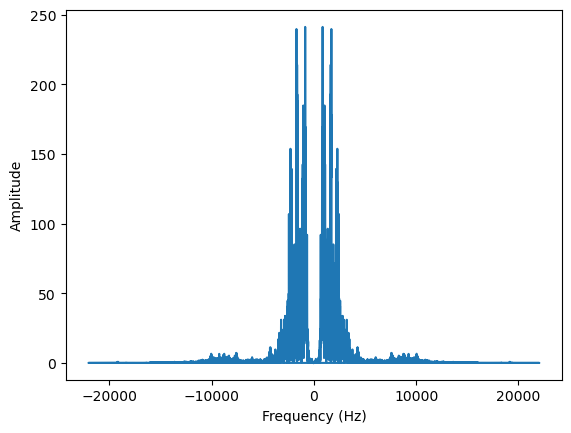

In [ ]:
import torch

# 计算频谱
spectrum = torch.fft.fft(waveform)
freqs = torch.fft.fftfreq(waveform.shape[-1], d=1/sample_rate)

# 绘制频谱图形
plt.figure()
plt.plot(freqs, torch.abs(spectrum[0]))
# plt.plot(freqs)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

sample_rate=44100 n_fft=220500, hop_length=8820
time shape:(1103,) data:[0.00000000e+00 4.53514739e-03 9.07029478e-03 ... 4.98866213e+00
 4.99319728e+00 4.99773243e+00]
freq shape:(201,) data:[    0.     110.25   220.5    330.75   441.     551.25   661.5    771.75
   882.     992.25  1102.5   1212.75  1323.    1433.25  1543.5   1653.75
  1764.    1874.25  1984.5   2094.75  2205.    2315.25  2425.5   2535.75
  2646.    2756.25  2866.5   2976.75  3087.    3197.25  3307.5   3417.75
  3528.    3638.25  3748.5   3858.75  3969.    4079.25  4189.5   4299.75
  4410.    4520.25  4630.5   4740.75  4851.    4961.25  5071.5   5181.75
  5292.    5402.25  5512.5   5622.75  5733.    5843.25  5953.5   6063.75
  6174.    6284.25  6394.5   6504.75  6615.    6725.25  6835.5   6945.75
  7056.    7166.25  7276.5   7386.75  7497.    7607.25  7717.5   7827.75
  7938.    8048.25  8158.5   8268.75  8379.    8489.25  8599.5   8709.75
  8820.    8930.25  9040.5   9150.75  9261.    9371.25  9481.5   9591.75
  970

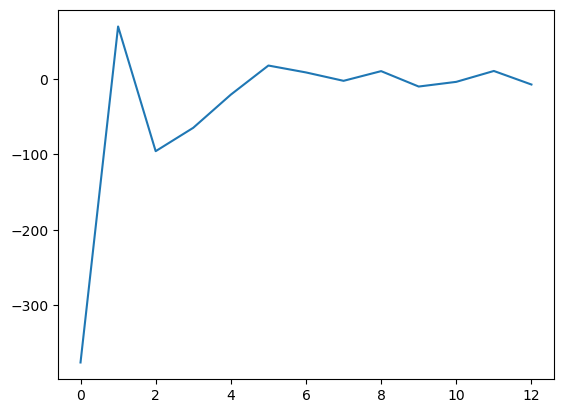

In [ ]:
# wnd = 25ms, overlap = 10ms
# sample_rate = 8000
# wnd = 
# overlap = 1
# nfft = waveform.shape[1] # sample_rate * wnd // 1000
hop = sample_rate * overlap // 1000
print(f'sample_rate={sample_rate} n_fft={nfft}, hop_length={hop}')

MFCC = torchaudio.transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    # melkwargs={"n_fft": nfft, "hop_length": hop, "n_mels": 23, "center": False},
)

mfcc = MFCC(waveform)
time = np.arange(mfcc.shape[-1]) * step / sample_rate
freq = np.fft.rfftfreq(frame_size) * sample_rate
# print(f'step:{step}')
print(f'time shape:{time.shape} data:{time}')
print(f'freq shape:{freq.shape} data:{freq}')

print(mfcc.shape)
magnitude = mfcc[0,:]
print(magnitude.T.shape)
print(magnitude[:,550])

# 绘制 MFCC 图形
plt.figure()
# plt.imshow(mfcc[0], cmap='gray', aspect='auto', origin='lower')
plt.plot(magnitude.T[550])
plt.show()

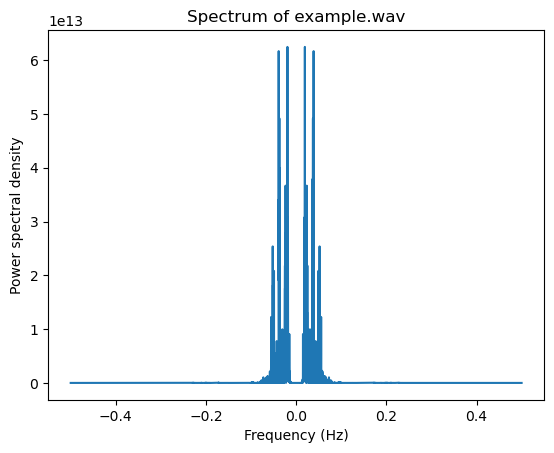

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
import numpy as np

file = '/home/jovyan/data/ESC-50-master/audio/1-100032-A-0.wav'

# 读取 wav 文件
sample_rate, data = wavfile.read(file)

# 计算 FFT
fft_out = fft(data)

# 计算频率和幅度
freqs = np.fft.fftfreq(len(fft_out))
idx = np.argsort(freqs)
psd = np.abs(fft_out) ** 2

# 绘制频谱图
plt.plot(freqs[idx], psd[idx])
plt.title('Spectrum of example.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.show()

以下代码来自 https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html

In [ ]:

def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


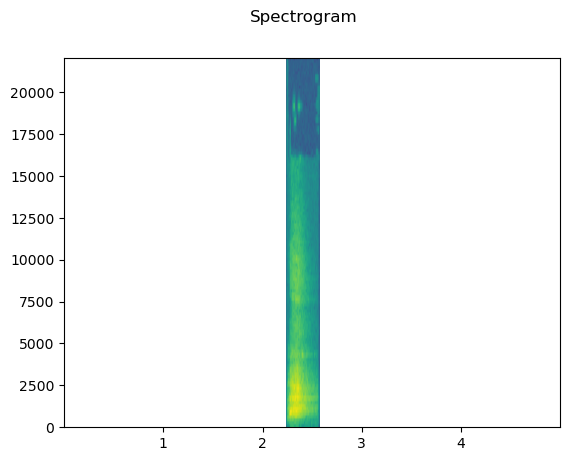

In [ ]:
plot_specgram(data, sample_rate)

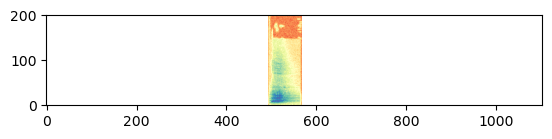

In [ ]:
import torchaudio
from torchaudio.transforms import Spectrogram
import matplotlib.pyplot as plt

# 加载音频文件并获取音频信号和采样率（这里假设您已经加载了音频文件并获取了音频信号和采样率）
# waveform, sample_rate = torchaudio.load('audio.wav')

# 计算时频图
spectrogram = Spectrogram(n_fft=400)(data)

# 绘制时频图 (viridis, Spectral)
plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='Spectral', origin='lower')


在上述代码中，x 轴和 y 轴的单位并不是时间和频率，而是帧索引和频率索引。由于上述代码并没有对 x 轴和 y 轴进行标注，因此您看到的 x 轴和 y 轴的范围实际上是帧索引和频率索引的范围。

如果您想要在图中显示具体的时间和频率值，可以使用 matplotlib 库中的 xticks 和 yticks 函数进行设置。下面是一个示例，它展示了如何在时频图中显示具体的时间和频率值：

Text(0, 0.5, 'Frequency (Hz)')

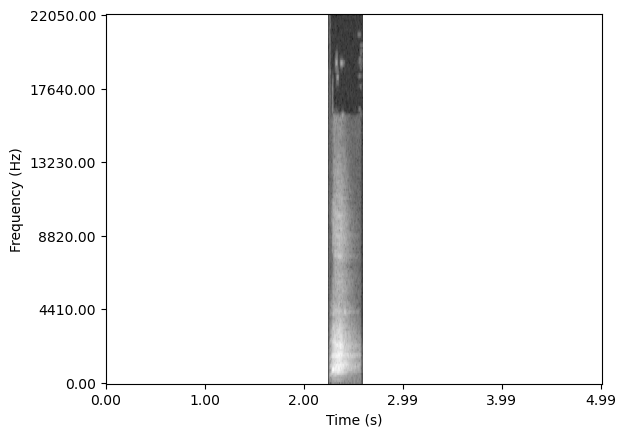

In [ ]:
import torchaudio
from torchaudio.transforms import Spectrogram
import matplotlib.pyplot as plt

# 加载音频文件并获取音频信号和采样率（这里假设您已经加载了音频文件并获取了音频信号和采样率）
# waveform, sample_rate = torchaudio.load('audio.wav')
waveform = data

# 计算时频图
n_fft = 400
hop_length = n_fft // 2
spectrogram = Spectrogram(n_fft=n_fft, hop_length=hop_length)(waveform)

# 绘制时频图
plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='gray', aspect='auto', origin='lower')

# 设置 x 轴和 y 轴的标签
x_ticks = np.arange(0, spectrogram.shape[-1], spectrogram.shape[-1] // 5)
x_labels = ["{:.2f}".format(t * hop_length / sample_rate) for t in x_ticks]
plt.xticks(x_ticks, x_labels)

y_ticks = np.arange(0, spectrogram.shape[-2], spectrogram.shape[-2] // 5)
y_labels = ["{:.2f}".format(t * sample_rate / n_fft) for t in y_ticks]
plt.yticks(y_ticks, y_labels)

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')


In [ ]:
# Define custom feature extraction pipeline.
#
# 1. Resample audio
# 2. Convert to power spectrogram
# 3. Apply augmentations
# 4. Convert to mel-scale
#
class MyPipeline(torch.nn.Module):
    def __init__(
        self,
        input_freq=16000,
        resample_freq=8000,
        n_fft=1024,
        n_mel=256,
        stretch_factor=0.8,
    ):
        super().__init__()
        self.resample = Resample(orig_freq=input_freq, new_freq=resample_freq)

        self.spec = Spectrogram(n_fft=n_fft, power=2)

        self.spec_aug = torch.nn.Sequential(
            TimeStretch(stretch_factor, fixed_rate=True),
            FrequencyMasking(freq_mask_param=80),
            TimeMasking(time_mask_param=80),
        )

        self.mel_scale = MelScale(
            n_mels=n_mel, sample_rate=resample_freq, n_stft=n_fft // 2 + 1)

    def forward(self, waveform: torch.Tensor) -> torch.Tensor:
        # Resample the input
        resampled = self.resample(waveform)

        # Convert to power spectrogram
        spec = self.spec(resampled)

        # Apply SpecAugment
        spec = self.spec_aug(spec)

        # Convert to mel-scale
        mel = self.mel_scale(spec)

        return mel

NameError: name 'torch' is not defined

In [ ]:
# Instantiate a pipeline
pipeline = MyPipeline()

# Move the computation graph to CUDA
pipeline.to(device=torch.device("cuda"), dtype=torch.float32)

# Perform the transform
features = pipeline(waveform)

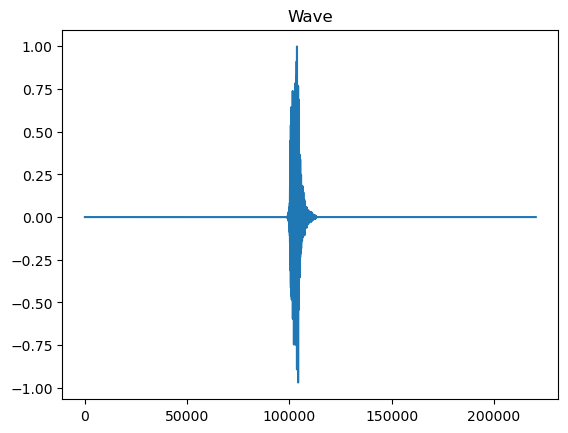

In [ ]:
plt.plot(data[0])
plt.title('Wave')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power spectral density')
plt.show()

In [ ]:
# wnd = 25ms, overlap = 10ms
# sample_rate = 8000
wnd = 25
overlap = 10
nfft = sample_rate * wnd // 1000
hop = sample_rate * overlap // 1000
print(f'sample_rate={sample_rate} n_fft={nfft}, hop_length={hop}')

MFCC = torchaudio.transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    melkwargs={"n_fft": nfft, "hop_length": hop, "n_mels": 23, "center": False},
)

MELSPECTROGRAM = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=nfft,
    hop_length=hop,
)

mfcc = MFCC(data).numpy()
melspec = MELSPECTROGRAM(data).numpy()

print(f'data shape={data.shape}')
print(f'mfcc shape={mfcc.shape}')
print(f'melspec shape={melspec.shape}')


sample_rate=44100 n_fft=1102, hop_length=441
data shape=torch.Size([1, 220500])
mfcc shape=(1, 13, 498)
melspec shape=(1, 128, 501)


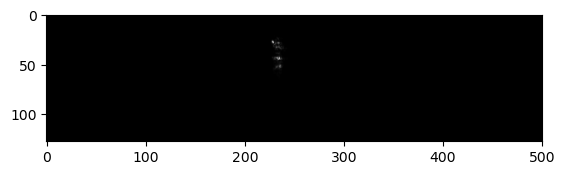

In [ ]:
# 绘制频谱图
plt.figure()
plt.imshow(melspec[0], cmap='gray')

In [ ]:
rvec = vec.transpose(1, 0)
print(rvec.shape)
print(rvec[0])

(1376, 13)
[-2.21618683e+02 -2.86102295e-06 -7.62939453e-06  3.81469727e-06
 -2.86102295e-06  1.04904175e-05 -3.81469727e-06  2.19345093e-05
 -3.91006470e-05  3.91006470e-05  1.04904175e-05 -1.04904175e-05
 -1.23977661e-05]


spectrogram shape=torch.Size([1, 201, 1103])


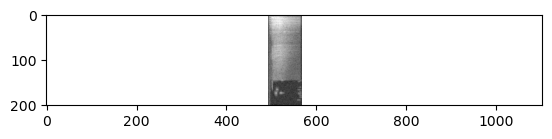

In [ ]:
# 计算频谱图
spectrogram = torchaudio.transforms.Spectrogram()(data)
print(f'spectrogram shape={spectrogram.shape}')
# 绘制频谱图
plt.figure()
plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='gray')

In [ ]:
transform = torchaudio.transforms.Vad(sample_rate=sample_rate, trigger_level=7.5)

waveform_reversed_front_trim = transform(data)
# waveform_end_trim, sample_rate = apply_effects_tensor(
#     waveform_reversed_front_trim, sample_rate, [["reverse"]]
# )
print(waveform_reversed_front_trim)

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])


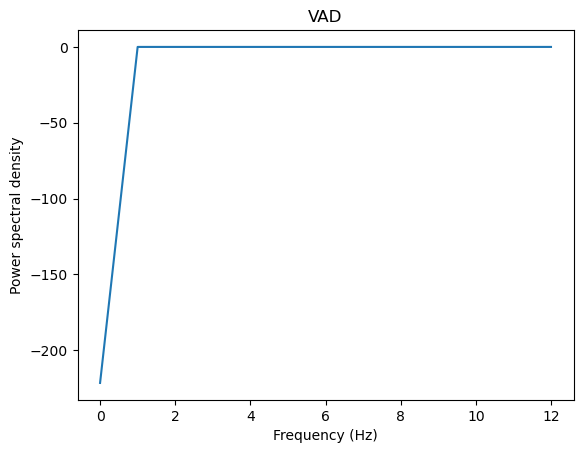

In [ ]:
import matplotlib.pyplot as plt

ofs = 400
# for i in range(vec.shape[0]):
#     plt.bar(i, np.sum(vec[i][320:480]))
#     print(f'vec[{i}]={np.sum(vec[i])}')
plt.plot(rvec[ofs])
plt.title('VAD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.show()

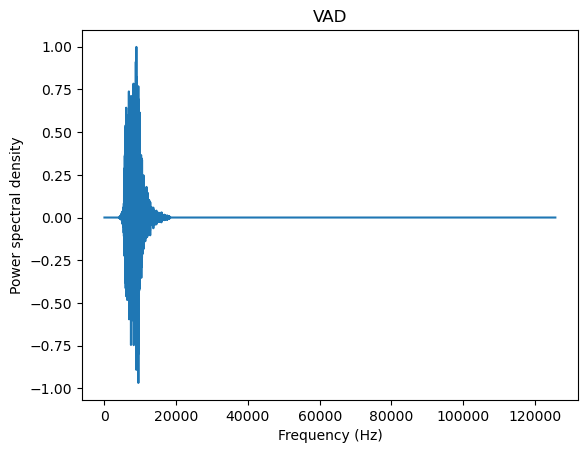

In [ ]:
import matplotlib.pyplot as plt

transform = torchaudio.transforms.Vad(sample_rate=sample_rate, trigger_level=7.5)
waveform_reversed_front_trim = transform(data)


plt.plot(waveform_reversed_front_trim[0])
plt.title('VAD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.show()

In [ ]:
print(vad.shape)

torch.Size([1, 125685])
